<a href="https://colab.research.google.com/github/Balajee-Dutta/myproject/blob/main/week3_beg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson: Introduction to Classification and Logistic Regression
Objective: In this lesson, you will learn about classification, how logistic regression works, how decision boundaries are formed, and the importance of regularization to prevent overfitting.

**Step 1: What is Classification?**

Classification is a type of supervised learning where the goal is to predict the category or class of an observation.

Examples:

- Binary Classification: Predict whether an email is spam or not spam.
- Multiclass Classification: Predict the type of an object (e.g., cat, dog, car).

Step 2: Logistic Regression for Binary Classification
Logistic regression is commonly used for binary classification problems, where the target variable has two possible outcomes (e.g., 0 or 1).
1. Sigmoid Function:
Logistic regression uses the sigmoid function to model the probability that an observation belongs to a class.

𝜎(𝑧) = 1 / (1+𝑒^−𝑧)

- Output of the sigmoid function: values between 0 and 1, representing probabilities.
2. Binary Cross-Entropy Loss:
The loss function for logistic regression is binary cross-entropy, which measures how well the model’s predicted probabilities match the true labels.

Step 3: Building a Logistic Regression Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create dataset
data = {
    'hours_study': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'passed_exam': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
X = df[['hours_study']].values
y = df['passed_exam'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task:**
Create a logistic regression model, train it on the data, and calculate the accuracy.

In [2]:
# CODE HERE
# Task: Create and train the logistic regression model, then calculate the accuracy.
model = LogisticRegression()
# Make predictions and evaluate accuracy
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
# END CODE
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


Step 4: Decision Boundary
- The decision boundary is the line that separates different classes in logistic regression.

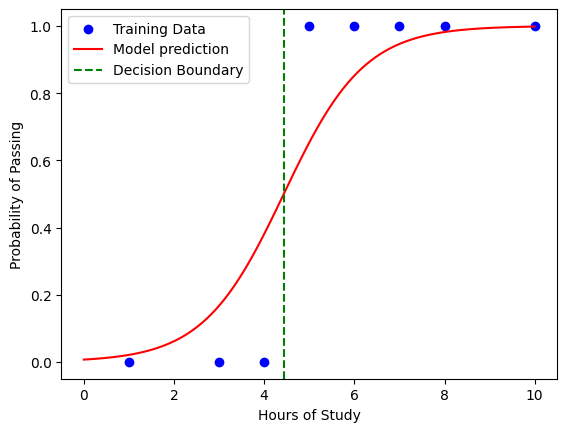

In [3]:
# Task: Plot the training data and decision boundary
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_train, y_train, label='Training Data', color='blue')

# Plot the decision boundary
x_vals = np.linspace(0, 10, 100)
y_vals = model.predict_proba(x_vals.reshape(-1, 1))[:, 1]  # Probabilities
plt.plot(x_vals, y_vals, label='Model prediction', color='red')

# Plot the decision boundary
# The decision boundary occurs where the probability is 0.5
decision_boundary_x = x_vals[np.abs(y_vals - 0.5).argmin()]  # Find the x value where y = 0.5
plt.axvline(decision_boundary_x, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Hours of Study')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()

Step 4: Overfitting and Regularization
- Overfitting occurs when a model learns noise from the training data and performs poorly on new data. To prevent overfitting, we use regularization.
- Train a logistic regression model with L2 regularization by setting the C parameter to a smaller value (which increases regularization strength).

In [4]:
# Task: Train logistic regression with regularization (L2) and evaluate its performance
model_reg = LogisticRegression(C=0.1)  # C=0.1 means stronger regularization
model_reg.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred_reg = model_reg.predict(X_test)
accuracy_reg = accuracy_score(y_test, y_pred_reg)
print(f'Accuracy with regularization: {accuracy_reg}')

Accuracy with regularization: 1.0


Summary:
In this exercise, you:
- Built a logistic regression model for binary classification.
- Visualized the decision boundary.
- Learned how regularization helps prevent overfitting.

---

Questions:
- What is the purpose of the sigmoid function in logistic regression?
- Why do we use regularization in logistic regression, and how does it affect the model?
- How would increasing the regularization strength (decreasing C) affect the decision boundary?


# Advanced Exercise: Logistic Regression and Classification

Welcome to the advanced module for Week 3 of our Machine Learning course. In this notebook, we will dive deeper into logistic regression, expand its application, and explore advanced concepts such as regularization, evaluation metrics, and optimization techniques.

## Objectives
- Implement advanced logistic regression with regularization.
- Evaluate the model using metrics beyond accuracy (precision, recall, F1-score, ROC-AUC).
- Visualize decision boundaries and model performance.
- Extend logistic regression to multi-class classification.

Let's get started!


In [5]:

# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import make_classification


## Step 1: Generate the Dataset
In this step, we'll create a synthetic dataset to simulate a binary classification problem.

**Why synthetic data?**
- Allows us to control complexity (e.g., number of features, classes).
- Helps focus on the learning process without worrying about noisy real-world data.

In [6]:
# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

# Interactive Task: Try changing 'n_classes' or 'n_features' and observe the data changes.
# For example, use 'n_classes=3' for multi-class classification.

## Task: Train-Test Split
Split the dataset into training and testing sets. This helps evaluate the model's performance on unseen data, mimicking real-world scenarios.

**Why do this?**
- Training data is used to teach the model.
- Testing data evaluates its generalization ability.

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # You need to provide arguments to train_test_split

# Analysis: How does changing 'test_size' affect the model's performance?
# Try setting 'test_size=0.4' or '0.5'.
# Try setting 'test_size=0.4' or '0.5'.

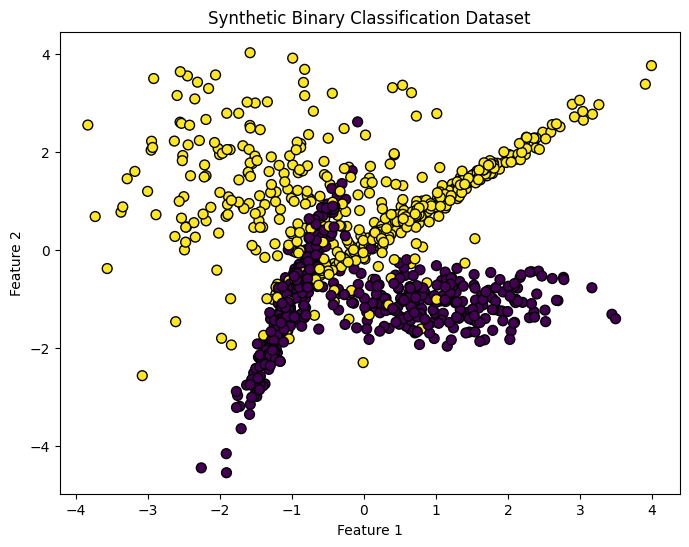

In [ ]:

# Visualizing the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Training a Logistic Regression Model
In this step, we'll train a logistic regression model using L2 regularization (Ridge). Regularization helps prevent overfitting by penalizing large weights.

**Why Logistic Regression?**
- It's simple yet powerful for binary and multi-class classification tasks.
- Provides interpretable coefficients, indicating feature importance.

**Task**
- Implement the code to train a logistic model on the training set
- Use the fitted model to predict values for the testing set

**Follow up**
- Add and change the regularization strength parameter (e.g C=0.3) and observe how it affects the model's decision boundary.
- Try different penalties like L1 (e.g penalty='l1') or no penalty.

In [22]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# ----------------------------
# 1. Generate a Synthetic Dataset
# ----------------------------
# Create a synthetic binary classification dataset with 2 informative features.
# Using 2 features allows us to visualize the decision boundary.
X, y = make_classification(n_samples=200,         # Total samples
                           n_features=2,          # Two features for easy plotting
                           n_redundant=0,         # No redundant features
                           n_informative=2,       # Both features are informative
                           n_clusters_per_class=1,
                           random_state=42)

# ----------------------------
# 2. Split the Data into Training and Testing Sets
# ----------------------------
# Here, 30% of the data is reserved for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# ----------------------------
# 3. Initialize and Train the Logistic Regression Model
# ----------------------------
# Initialize the Logistic Regression model with:
#   - L2 regularization (penalty='l2')
#   - Regularization strength parameter C=0.3 (smaller C means stronger regularization)
#   - 'liblinear' solver which supports both L1 and L2 penalties.
model = LogisticRegression(penalty='l2', C=0.3, solver='liblinear', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)



LogisticRegression(C=0.3, random_state=42, solver='liblinear')

## Evaluating the Model

Evaluating a model's performance helps us understand its effectiveness on unseen data. We'll use:

1. **Classification Report:** Summarizes metrics like precision, recall, and F1 score.
2. **Confusion Matrix:** Helps us visualize prediction errors and identify any bias in the model.
3. **ROC Curve:** The ROC curve shows the trade-off between the true positive rate (TPR) and false positive rate (FPR) across thresholds.
4. **AUC Value:** AUC (Area Under the Curve) quantifies the model's ability to distinguish between classes. A higher AUC indicates better model performance.

**Analysis**
- Which metric to prioritize for imbalanced datasets?

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60

Confusion Matrix:
 [[28  6]
 [ 2 24]]
AUC: 0.9242081447963801


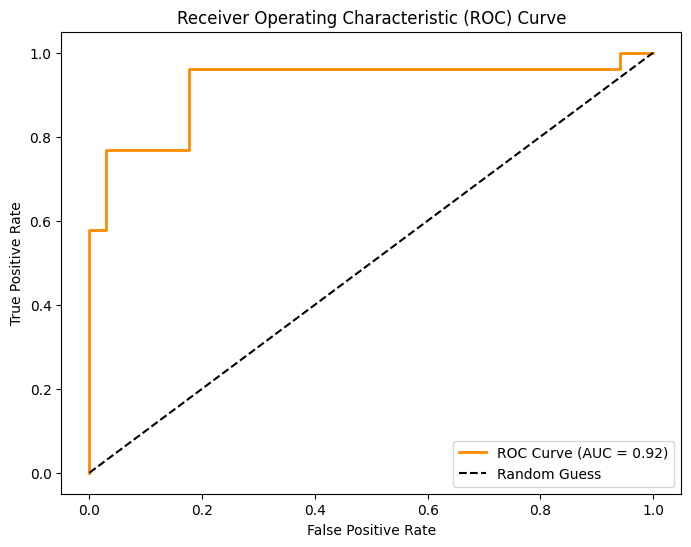

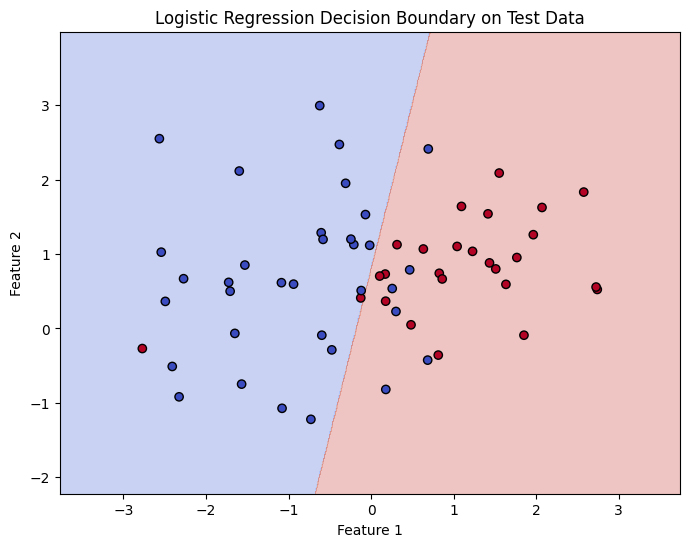

In [23]:
# Predict class labels on the test data
y_pred = model.predict(X_test)

# ----------------------------
# 5. Evaluate the Model
# ----------------------------
# Print the Classification Report (includes precision, recall, and F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the Confusion Matrix to see the counts of true/false positives/negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# For imbalanced datasets, consider prioritizing metrics like precision, recall, or the F1-score,
# rather than accuracy alone.

# ----------------------------
# 6. Compute and Plot the ROC Curve and AUC
# ----------------------------
# Obtain the predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# ----------------------------
# 7. Plot the Decision Boundary with Test Data
# ----------------------------
# Define the mesh grid boundaries based on the test data for plotting
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

# Generate a grid of points with a step size of 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the trained model to predict on every point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using a filled contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Overlay the test data points; color them based on their true class label
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary on Test Data")
plt.show()

# ----------------------------
# 8. Experimenting with Regularization
# ----------------------------
# To observe the effect of regularization strength and type, you can experiment by:
#   - Changing the C parameter (e.g., C=0.3 for stronger regularization, C=1.0 for default, etc.)
#   - Switching to L1 regularization by setting penalty='l1'
#     (Note: When using L1, ensure the chosen solver supports it, e.g., solver='liblinear' or 'saga')
#
# For example:
# model_l1 = LogisticRegression(penalty='l1', C=0.3, solver='liblinear', random_state=42)
# model_l1.fit(X_train, y_train)
# y_pred_l1 = model_l1.predict(X_test)
# You can then compare the decision boundaries and metrics with the L2-regularized model.

## Challenge Exercise - Implementing Multi-Class Logistic Regression

### Generating the dataset

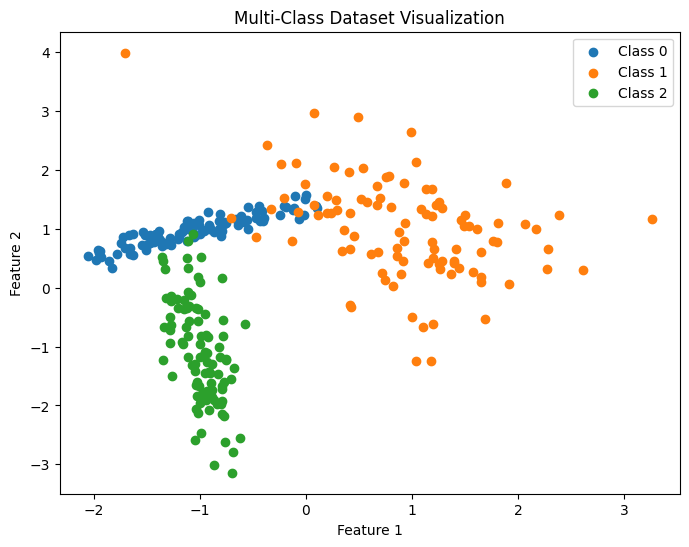

In [30]:
# Generate a multi-class dataset
X_mc, y_mc = make_classification(
    n_samples=300,   # Number of samples
    n_features=2,    # Number of features
    n_classes=3,     # Number of classes
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Plotting the generated data
plt.figure(figsize=(8, 6))
for class_label in range(3):
    plt.scatter(X_mc[y_mc == class_label, 0], X_mc[y_mc == class_label, 1], label=f'Class {class_label}')
plt.title('Multi-Class Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Training and predicting

In [32]:
# Assume X_mc and y_mc are already defined from the previous multi-class dataset generation

# Train-test split: splitting the dataset into 70% training and 30% testing
X_mc_train, X_mc_test, y_mc_train, y_mc_test = train_test_split(X_mc, y_mc, test_size=0.3, random_state=42)

# Fit the multi-class logistic regression model
# Using multi_class='multinomial' and solver='lbfgs' to handle multi-class classification
model_mc = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model_mc.fit(X_mc_train, y_mc_train)

# Predictions on the test set
y_mc_pred = model_mc.predict(X_mc_test)

# Print the classification report for the multi-class model
print("Classification Report for Multi-Class:\n", classification_report(y_mc_test, y_mc_pred))

Classification Report for Multi-Class:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.92      0.89      0.91        38
           2       1.00      0.84      0.91        25

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.88        90
weighted avg       0.89      0.88      0.88        90



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Visualizing the Decision Boundaries

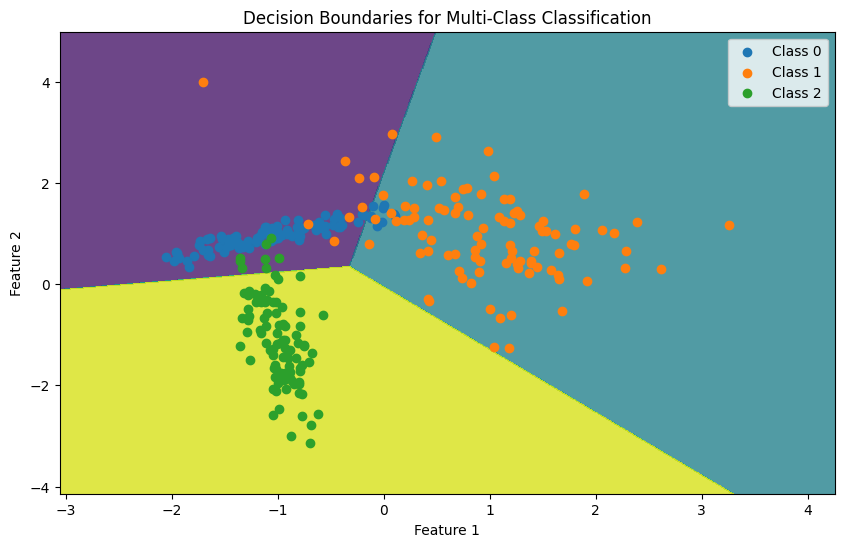

In [33]:
# Create a mesh grid
x_min, x_max = X_mc[:, 0].min() - 1, X_mc[:, 0].max() + 1
y_min, y_max = X_mc[:, 1].min() - 1, X_mc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = model_mc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the actual data points
for class_label in np.unique(y_mc):
    plt.scatter(X_mc[y_mc == class_label, 0], X_mc[y_mc == class_label, 1], label=f'Class {class_label}')

plt.title('Decision Boundaries for Multi-Class Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()